Project Overview: 

The quest for romantic love (or at the very least, a date) is at the root of this project. Through regression analysis techniques this project seeks to distill and quantify data collected from experimental speed dating events to shed light on gendered dating behavior and preferences. This study is primarily interested in the attributes that influence the selection of a romantic partners. Questions under consideration include:

What are the least and most desirable attributes in a male partner? Does this differ for female partners?

How important do people think attractiveness is in potential mate selection vs. its real impact?

Are shared interests more important than a shared racial background?

Can people accurately predict their own perceived value in the dating market?


In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import statsmodels.api as sm 
import pylab as pl
import seaborn as sns

In [29]:
df = pd.read_csv("../desktop/Speed Dating Data.csv") #import data
#groupby subject id 
dfgrouped = df.groupby('iid') #groupby subject id 
print df.head()

   iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

    ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2 

In [4]:
men = df[df['gender'] == 1] #split gender 
women = df[df['gender'] == 0]
women.fillna(value=0,inplace=True)
men.fillna(value=0, inplace = True)

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
print men

      iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
100    11   1.0       1    2       1     1     10         7       0.0      4   
101    11   1.0       1    2       1     1     10         3       0.0     10   
102    11   1.0       1    2       1     1     10         9       0.0      6   
103    11   1.0       1    2       1     1     10         6       0.0      3   
104    11   1.0       1    2       1     1     10         4       0.0      1   
105    11   1.0       1    2       1     1     10         8       0.0      5   
106    11   1.0       1    2       1     1     10         5       0.0      2   
107    11   1.0       1    2       1     1     10        10       0.0      7   
108    11   1.0       1    2       1     1     10         1       0.0      8   
109    11   1.0       1    2       1     1     10         2       0.0      9   
110    12   2.0       1    4       1     1     10         7       0.0      3   
111    12   2.0       1    4       1    

In [6]:
input_vars = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar','race']

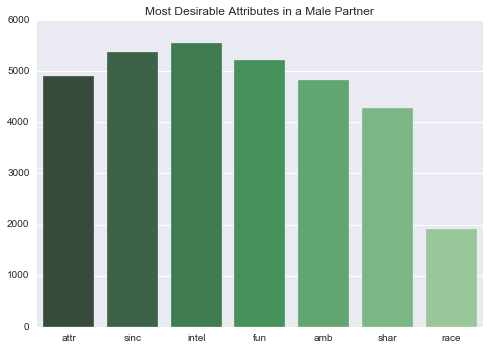

In [7]:
matched_df = women[women['match']==1]
matched_df_vars = matched_df[input_vars]
histogram_data = matched_df_vars.sum(axis=0)
sns.barplot(x=histogram_data.index, y=histogram_data,  palette="Greens_d");
sns.plt.title('Most Desirable Attributes in a Male Partner')

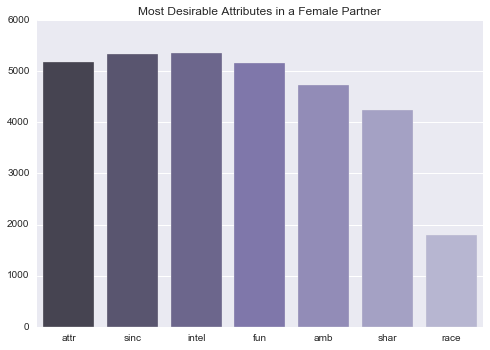

In [8]:
matched_df = men[men['match']==1]
matched_df_vars = matched_df[input_vars]
histogram_data = matched_df_vars.sum(axis=0)
sns.barplot(x=histogram_data.index, y=histogram_data,  palette="Purples_d");
sns.plt.title('Most Desirable Attributes in a Female Partner')

In [9]:
#sklearn

#model by gender (women)
#women_clean = women[input_vars]

#women_clean.head()
x = women[input_vars]
x = sm.add_constant(x)
y = women.match
female_model = sm.OLS(y,x)
female_results = female_model.fit()
female_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     73.22
Date:                Mon, 05 Sep 2016   Prob (F-statistic):          2.55e-100
Time:                        15:52:29   Log-Likelihood:                -1547.2
No. Observations:                4184   AIC:                             3110.
Df Residuals:                    4176   BIC:                             3161.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1669      0.025     -6.736      0.000        -0.215    -0.118
attr           0.0224      0.003      6.758      0.000         0.016     0.029
sinc           0.0006      0.004      0.182      0.855        -0.006     0.008
intel          0.0040      0.004      1.017      0.309        -0.004     0.012
fun            0.0259      0.003      7.766      0.000         0.019     0.032
amb           -0.0110      0.003     -4.186      0.000        -0.016    -0.006
shar           0.0159      0.002      6.558      0.000         0.011     0.021
race           0.0035      0.004      0.806      0.420        -0.005     0.012
==============================================================================
Omnibus:                      920.289   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1639.392
Skew:                           1.481   Prob(JB):                         0.00
Kurtosis:                       3.794   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print female_results.conf_int()

              0         1
const -0.215415 -0.118286
attr   0.015876  0.028853
sinc  -0.006299  0.007591
intel -0.003749  0.011835
fun    0.019348  0.032415
amb   -0.016197 -0.005865
shar   0.011131  0.020626
race  -0.005027  0.012050


In [11]:
print np.exp(female_results.params)

const    0.846326
attr     1.022617
sinc     1.000647
intel    1.004051
fun      1.026219
amb      0.989029
shar     1.016005
race     1.003518
dtype: float64


In [12]:
x = men[input_vars]
x = sm.add_constant(x)
y = men.match
male_model = sm.OLS(y,x)
male_results = male_model.fit()
male_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     58.19
Date:                Mon, 05 Sep 2016   Prob (F-statistic):           5.63e-80
Time:                        15:52:34   Log-Likelihood:                -1594.9
No. Observations:                4194   AIC:                             3206.
Df Residuals:                    4186   BIC:                             3256.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1201      0.025     -4.848      0.000        -0.169    -0.072
attr           0.0302      0.003      8.867      0.000         0.024     0.037
sinc          -0.0024      0.004     -0.612      0.540        -0.010     0.005
intel         -0.0038      0.004     -0.882      0.378        -0.012     0.005
fun            0.0206      0.004      5.660      0.000         0.013     0.028
amb           -0.0026      0.003     -0.890      0.374        -0.008     0.003
shar           0.0141      0.003      5.562      0.000         0.009     0.019
race          -0.0165      0.004     -3.744      0.000        -0.025    -0.008
==============================================================================
Omnibus:                      975.997   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1792.035
Skew:                           1.539   Prob(JB):                         0.00
Kurtosis:                       3.881   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These results indicate that men and women are seeking similar attributes in a partner: sincerity, intelligence, and a sense of humour rank hightest for both. The most statistically significant coefficients with p-values of 0.00 are attractiveness, sense of humour, ambition, and shared interests (true for both men and women). 

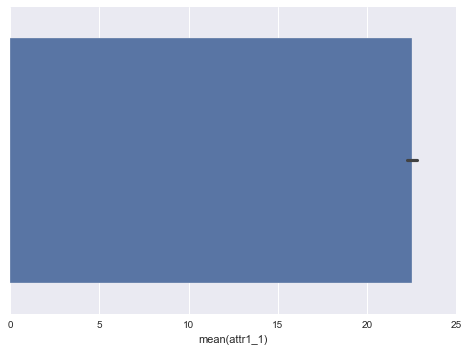

In [13]:
sns.barplot(x="attr1_1", data=df); #importance of attractiveness in a partner
#transform df group as self/other
#.stack()

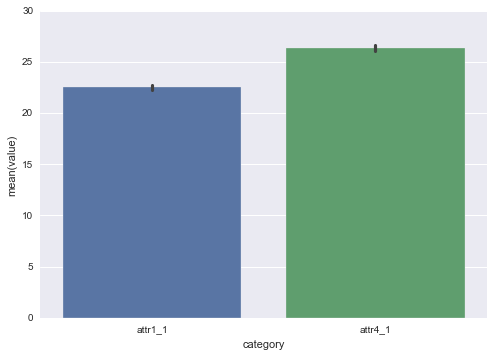

In [14]:
attractiveness = df[['attr1_1','attr4_1']] ##keep this one 

attractiveness = attractiveness.apply(lambda x : x.fillna(x.mean())).stack().reset_index(-1)
attractiveness.columns = ['category', 'value']
sns.barplot (x= 'category', y= 'value',data= attractiveness)


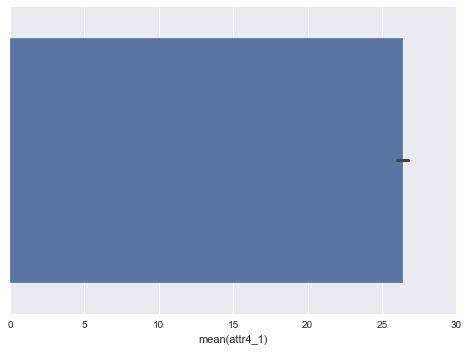

In [15]:
sns.barplot(x="attr4_1", data=df); #how important subject's think attractiveness is to others 

These results indicate that subjects believe attractiveness to be more important than it actually is on average for their dates. 

In [16]:
race_sharedinterests = ['race', 'shar']

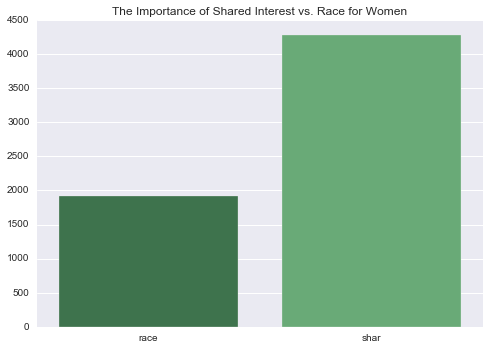

In [17]:
matched_df1 = women[women['match']==1]
matched_df_vars1 = matched_df1[race_sharedinterests]
histogram_data = matched_df_vars1.sum(axis=0)
sns.barplot(x=histogram_data.index, y=histogram_data,  palette="Greens_d");
sns.plt.title('The Importance of Shared Interest vs. Race for Women')

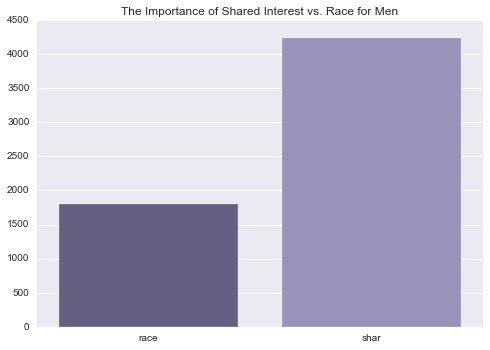

In [18]:
matched_df1 = men[men['match']==1]
matched_df_vars1 = matched_df1[race_sharedinterests]
histogram_data = matched_df_vars1.sum(axis=0)
sns.barplot(x=histogram_data.index, y=histogram_data,  palette="Purples_d");
sns.plt.title('The Importance of Shared Interest vs. Race for Men')

These results indicate that both men and women are significantly more interested in having shared interests with their date than their date's racial background. 

In [29]:
attractive_percieved_real = ['attr1_1','attr4_1']

In [30]:
#histogram_data1 = attractive_percieved_real.sum(axis=0)
#sns.barplot(x = histogram_data1.index, y = histogram_data1, palette="Reds_d")

AttributeError: 'list' object has no attribute 'sum'

In [31]:
inputvariables = ['race','match']
samerace = dfgrouped[dfgrouped['samerace'] == 1]
differentrace = dfgrouped[dfgrouped['samerace'] == 0]
matched_df12 = samerace[samerace['match']==1]
matched_df_vars12 = matched_df12[inputvariables]
histogram_data1 = matched_df_vars12.sum(axis=0)
sns.barplot(x=histogram_data1.index, y=histogram_data1,  palette="Purples_d");


#race = df[['samerace']==1, ['samerace'==0]]
#race = race.apply(lambda x : x.fillna(x.mean())).stack().reset_index(-1)
#race.columns = ['category', 'value']
#sns.barplot (x= 'category', y= 'value',data= race)
#samerace = df[df['samerace'] == 1]
#differentrace = df[df['samerace']==0]#split race 
#results_race = ['samerace', 'different race']
#match= df[df['match']==1]
#sns.barplot(x = samerace, y= match, df=samerace)
#sns.factorplot(x="samerace", y="match", data=samerace, kind="bar");
#sns.factorplot(x="differentrace", y="match", data=differentrace, kind="bar");

import matplotlib.pyplot as plt
3from collections import Counter

plt.show()

SyntaxError: invalid syntax (<ipython-input-31-5e4102d5413a>, line 23)

In [32]:
samerace = df[df['samerace'] == 1]
differentrace = df[df['samerace'] == 0]
matched_df12 = samerace[samerace['match']==1]
matched_df_vars12 = matched_df12[inputvariables]
histogram_data1 = matched_df_vars12.sum(axis=0)
sns.barplot(x=histogram_data1.index, y=histogram_data1,  palette="Purples_d");
matched_df12.sum()

NameError: name 'inputvariables' is not defined

In [33]:
keep_cols = ['iid','match','samerace','gender']
df_race = df[keep_cols]
samerace = df_race[df_race['samerace']==0]
matched_samerace = samerace[samerace[['match']==1
                            



SyntaxError: invalid syntax (<ipython-input-33-03ac9982b1c2>, line 5)

In [34]:
keep_cols = ['match','samerace','gender']
df_race = df[keep_cols]
samerace = df_race[df_race['samerace']==0]
matched_samerace = samerace[samerace['match']==1]

sns.barplot(x = samerace, y = matched_samerace, palette="Reds_d")

ValueError: cannot copy sequence with size 3 to array axis with dimension 5062

In [35]:
keep_cols = ['match','samerace','gender']
samerace = keep_cols[keep_cols['samerace'] == 1]
match = keep_cols[keep_cols['match']==1]
#sns.barplot(x='samerace', y='match')


sns.countplot(x= samerace, data= keep_cols, palette="Greens_d");

TypeError: list indices must be integers, not str

In [36]:
samerace = df[df['samerace'] == 1]
differentrace = df[df['samerace'] == 0]
#race = [samerace, differentrace]
#race = race.apply(lambda x : x.fillna(x.mean())).stack().reset_index(-1)
#race.columns = ['category', 'value']
#sns.barplot (x= 'category', y= 'value',data= race)
print samerace.sum()

iid         933755.00
id           29413.00
gender        1658.00
idg          56954.00
condtn        6172.00
wave         37272.00
round        56556.00
position     30684.00
positin1     25080.00
order        29798.00
partner      29413.00
pid         933755.00
match          566.00
int_corr       676.88
samerace      3316.00
age_o        87035.00
race_o        7794.00
pf_o_att     75443.41
pf_o_sin     56053.86
pf_o_int     67638.65
pf_o_fun     58541.83
pf_o_amb     34586.22
pf_o_sha     38714.57
dec_o         1439.00
attr_o       20455.90
sinc_o       23149.00
intel_o      23723.00
fun_o        20408.50
amb_o        20477.50
shar_o       16279.00
              ...    
amb1_3       18092.74
shar1_3      21336.15
attr7_3      28117.00
sinc7_3      13310.00
intel7_3     14181.00
fun7_3       14382.00
amb7_3        6685.00
shar7_3      10215.00
attr4_3      32948.00
sinc4_3      13339.00
intel4_3     14920.00
fun4_3       18335.00
amb4_3       12333.00
shar4_3      14368.00
attr2_3   

In [37]:
import matplotlib.pyplot as plt
from collections import Counter
samerace = df[df['samerace'] == 1]
samerace_matched = samerace[samerace['match']==1]
uValues = list( set( samerace_matched))
xVals = range( 0, len( uValues))
yVals = map( lambda x: samerace.count( uValues[x]), xVals)

import pylab
pylab.bar( xVals, yVals)

ValueError: No axis named fun4_2 for object type <class 'pandas.core.frame.DataFrame'>

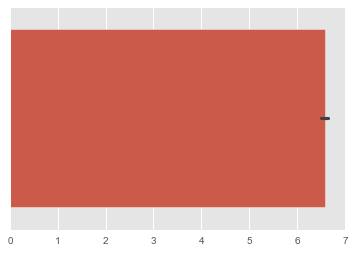

In [38]:
samerace = df[df['samerace'] == 1] #split race 
differentrace = df[df['samerace'] == 0]
samerace.fillna(value=0,inplace=True)
differentrace.fillna(value=0, inplace = True)

#x==samerace match 

matched_race = samerace[samerace['match']==1]
matched_differentrace =differentrace[differentrace['match']==1]
matched_df_vars1 = matched_race.sum(), matched_differentrace.sum()
sns.barplot(x=matched_df_vars)
#histogram_data1 = matched_df_vars1.sum(axis=0)
#sns.barplot(x=histogram_data1.index, y=histogram_data1,  palette="Purples_d");
#sns.plt.title('Most Desirable Attributes in a Female Partner')

In [100]:
#delete
samerace_matched = samerace[samerace['match']==1]
samerace_matchedvariables = samerace_matched[['samerace']==1]
histogram_data_race = samerace_matchedvariables.sum()
sns.barplot(x=histogram_data_race.index, y=histogram_data_race,  palette="Purples_d");
sne.barplot

#matched_df1 = men[men['match']==1]
#matched_df_vars1 = matched_df1[race_sharedinterests]
#histogram_data = matched_df_vars1.sum(axis=0)
#sns.barplot(x=histogram_data.index, y=histogram_data,  palette="Purples_d");
#sns.plt.title('Most Desirable Attributes in a Female Partner')

KeyError: False

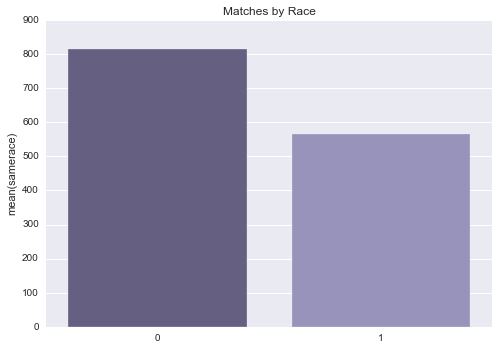

In [19]:
matched = df[df['match']==1]
values = pd.DataFrame(data=matched['samerace'].value_counts())
values.head()
sns.barplot(x= values.index, y= values.samerace,  palette="Purples_d");
sns.plt.title('Matches by Race')

In [109]:
samerace_matched.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2,1,1.0,0,1,1,1,10,7,0.0,10,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
13,2,2.0,0,3,1,1,10,3,0.0,1,...,7.0,6.0,9.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
18,2,2.0,0,3,1,1,10,3,0.0,4,...,7.0,6.0,9.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
33,4,4.0,0,7,1,1,10,6,0.0,4,...,6.0,5.0,6.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0
38,4,4.0,0,7,1,1,10,6,0.0,7,...,6.0,5.0,6.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0


In [52]:
***

x = women[input_vars]
x = sm.add_constant(x)
y = women.match
female_model = sm.Logit(y,x)
female_results = female_model.fit()
female_results.summary()

Optimization terminated successfully.
         Current function value: 0.379997
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  match   No. Observations:                 4184
Model:                          Logit   Df Residuals:                     4176
Method:                           MLE   Df Model:                            7
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.1513
Time:                        20:16:51   Log-Likelihood:                -1589.9
converged:                       True   LL-Null:                       -1873.3
                                        LLR p-value:                3.445e-118
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.1426      0.319    -19.242      0.000        -6.768    -5.517
attr           0.2158      0.030      7.127      0.000         0.156     0.275
sinc           0.0447      0.033      1.354      0.176        -0.020     0.109
intel          0.0794      0.039      2.057      0.040         0.004     0.155
fun            0.2852      0.033      8.530      0.000         0.220     0.351
amb           -0.0867      0.022     -3.941      0.000        -0.130    -0.044
shar           0.1188      0.021      5.794      0.000         0.079     0.159
race           0.0829      0.035      2.351      0.019         0.014     0.152
==============================================================================
"""

In [20]:
x = men[input_vars]
x = sm.add_constant(x)
y = men.match
male_model = sm.Logit(y,x)
male_results = male_model.fit()
male_results.summary()

Optimization terminated successfully.
         Current function value: 0.394484
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  match   No. Observations:                 4194
Model:                          Logit   Df Residuals:                     4186
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Sep 2016   Pseudo R-squ.:                  0.1177
Time:                        21:08:17   Log-Likelihood:                -1654.5
converged:                       True   LL-Null:                       -1875.1
                                        LLR p-value:                 3.327e-91
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.0628      0.276    -18.363      0.000        -5.603    -4.522
attr           0.2848      0.031      9.071      0.000         0.223     0.346
sinc           0.0040      0.036      0.113      0.910        -0.066     0.074
intel          0.0012      0.039      0.030      0.976        -0.076     0.078
fun            0.2034      0.033      6.076      0.000         0.138     0.269
amb           -0.0252      0.024     -1.061      0.289        -0.072     0.021
shar           0.1056      0.021      5.065      0.000         0.065     0.147
race          -0.1296      0.036     -3.588      0.000        -0.200    -0.059
==============================================================================
"""

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 8
false_positive_rate, true_positive_rate, thresholds = roc_curve(df['match'], results[0])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'results' is not defined